In [478]:
import sys
sys.path.append('../../30_data_tools/')

In [1]:
from pathlib import Path
from PIL import Image, ImageFont, ImageDraw
from random import choice
import numpy as np
import pandas as pd
from tqdm import tqdm

In [479]:
from helper import load_dotenv

In [2]:
from skimage.metrics import structural_similarity as ssim

In [480]:
dotenv = load_dotenv()

In [3]:
DATA_SET_DIR = Path('./dataset/train/')

In [4]:
def get_ssim( row ):
    return ssim(
        np.array(Image.open(row.moire_path))[:,:,0],
        np.array(Image.open(row.no_moire_path))[:,:,0]
    )

def get_images( m ):
    non_moire_path = m.parent.parent / 'no_moire' / m.name

    return m, non_moire_path

In [5]:
def get_tile_comparison( row ):
    moire_img = Image.open( row.moire_path )
    non_moire_img = Image.open( row.no_moire_path )

    out_img = Image.new('RGB', (moire_img.width + non_moire_img.width, moire_img.height + 40))
    out_img.paste(moire_img, (0, 0))
    out_img.paste(non_moire_img, (moire_img.size[0],0))

    font = ImageFont.load_default()
    draw = ImageDraw.Draw(out_img)
    draw.text((0, moire_img.size[1] + 5),"moire",(255,255,255),font=font)
    draw.text((moire_img.size[0], moire_img.size[1] + 5),"no moire",(255,255,255),font=font)
    draw.text((0, moire_img.size[1] + 25), row.img_name,(255,255,255),font=font)

    return out_img

In [6]:
moires = list(DATA_SET_DIR.glob('./moire/*.jpg'))
moires = pd.DataFrame(
    [get_images(m) for m in moires],
    columns=['moire_path','no_moire_path']
)
moires.loc[
    :,
    'img_name'
] = moires.moire_path.apply(lambda mp: mp.name.split('.jpg')[0])
moires.loc[:,'bad_tile'] = 0

for i in tqdm(range(moires.shape[0])):
    row = moires.iloc[i]
    
    moires.loc[
        row.name,
        'ssim'
    ] = get_ssim( row )

100%|██████████████████████████████████████| 1995/1995 [00:14<00:00, 142.44it/s]


In [7]:
0 / 0

ZeroDivisionError: division by zero

1646 verbleibend
0.9550456618733283


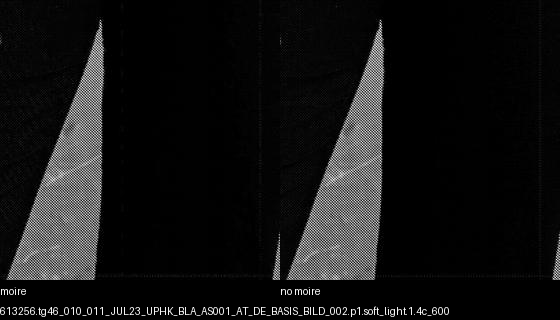

In [476]:
sample = moires.loc[
    (moires.bad_tile == 0)
].sample(n=1, weights=moires.ssim).iloc[0]

remaining = moires.loc[
    (moires.bad_tile == 0)
].shape[0]
print(f'{ remaining } verbleibend')
print(sample.ssim)

moires.loc[
    sample.name,
    'bad_tile'
] = 2

get_tile_comparison( sample )

In [477]:
moires.loc[
    sample.name,
    'bad_tile'
] = 1

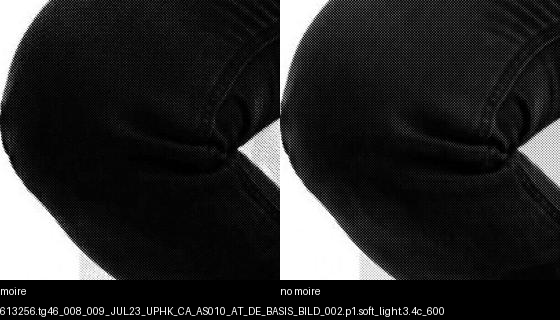

In [283]:
get_tile_comparison( moires.loc[
    (moires.img_name == '613256.tg46_008_009_JUL23_UPHK_CA_AS010_AT_DE_BASIS_BILD_002.p1.soft_light.3.4c_600') &
    (moires.bad_tile == 1)
].iloc[0] )

In [275]:
moires.loc[
    moires.bad_tile == 1
].img_name.value_counts()

612780.tg39_1000__147WW.DE.WX005.AT.141_10-12_39L_300.p2.soft_light.1.4c_600                12
508890.HBZP_1_M_270.p1.soft_light.2.4c_600                                                   7
613256.tg46_120_121_JUL23_UPHK_WA_AS001_AT_DE_BASIS_BILD_002.p1.soft_light.1.4c_600          6
508890.HBZP_1_M_270.p1.soft_light.1.4c_600                                                   3
613256.tg46_008_009_JUL23_UPHK_CA_AS010_AT_DE_BASIS_BILD_002.p1.soft_light.3.4c_600          3
613256.tg46_122_123_JUL23_UPHK_WA_AS002_AT_DE_BASIS_BILD_001.p1.soft_light.3.4c_600          2
613256.tg46_122_123_JUL23_UPHK_WA_AS002_AT_DE_BASIS_BILD_001.p1.soft_light.2.4c_600          1
613476.tg46_konv_693102_Top_03_BK_FS23_Suffix17_086_087_4C_Stuber.p1.soft_light.2.4c_600     1
613256.tg46_010_011_JUL23_UPHK_BLA_AS001_AT_DE_BASIS_BILD_002.p1.soft_light.1.4c_600         1
611808.tg42_20499 WWC+DE Katalog 11_2022_90.p1.soft_light.1.4c_600                           1
606688.tg45_009-488_Interieur_GW2021-2022_HD.p246.

In [488]:
moires.loc[
    moires.bad_tile != 0
].to_pickle(dotenv['MODEL_DIR'].parent / 'tile_quality' / '2024-02-18_01.pkl')

In [ ]:
wrong.append( sample )

if len(wrong) > 10:
    print("done!")

In [ ]:
i = 0

In [ ]:
print(wrong[i].name, i)
img = Image.open(wrong[i])
i += 1

img

In [372]:
import plotly.express as px